In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [13]:
# Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Load dataset
classification_data_path = '/content/drive/My Drive/AI/climate_change_data.csv'
classification_df = pd.read_csv(classification_data_path)

In [15]:
# Print Dataset Information
print("Dataset Overview:\n")
print(f"Shape: {classification_df.shape}\n")
print("First 5 rows:\n", classification_df.head())
print("\nData Types:\n", classification_df.dtypes)
print("\nMissing Values:\n", classification_df.isnull().sum())


Dataset Overview:

Shape: (10000, 9)

First 5 rows:
                             Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118903        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600   
3    12.309581     422.404983       -0.475931       5.193341  47.467938   
4    13.210885     410.472999        1.135757      78.695280  61.789672   

   Wind Speed  
0   18.492026  
1   34.249300  
2   34.124261  
3    8.554563  
4

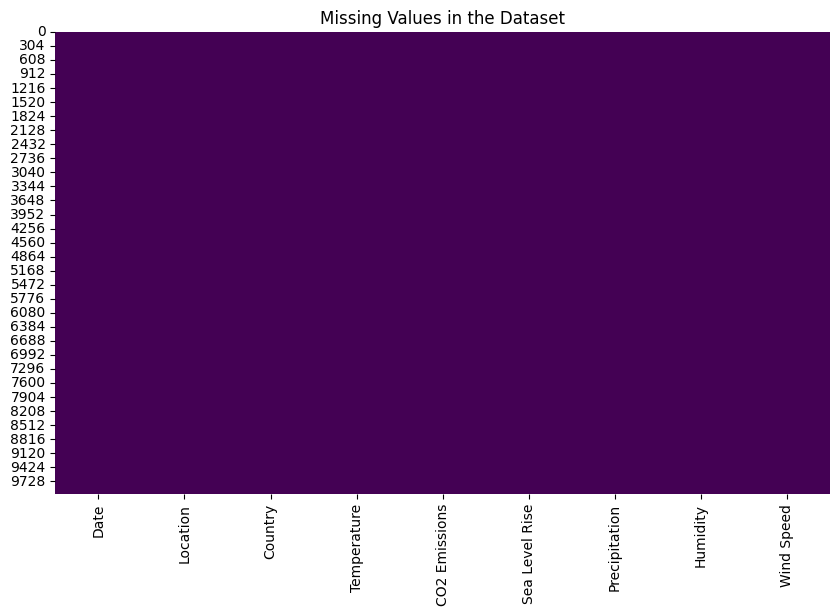

In [16]:
# 2️⃣ Exploratory Data Analysis (EDA)
# Visualizing missing values
plt.figure(figsize=(10,6))
sns.heatmap(classification_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()

In [17]:

# Filling missing values (if any)
classification_df.fillna(method='ffill', inplace=True)

<ipython-input-17-c17f525c6cbd>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  classification_df.fillna(method='ffill', inplace=True)


In [18]:
# Statistical summary
print("\nStatistical Summary:\n", classification_df.describe())



Statistical Summary:
         Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed  
count  10000.000000  10000.000000  
mean      49.771302     25.082066  
std       28.929320     14.466648  
min        0.018998      0.001732  
25%       24.713250     12.539733  
50%       49.678412     24.910787  
75%       75.206390     37.670260  
max       99.959665     49.997664  


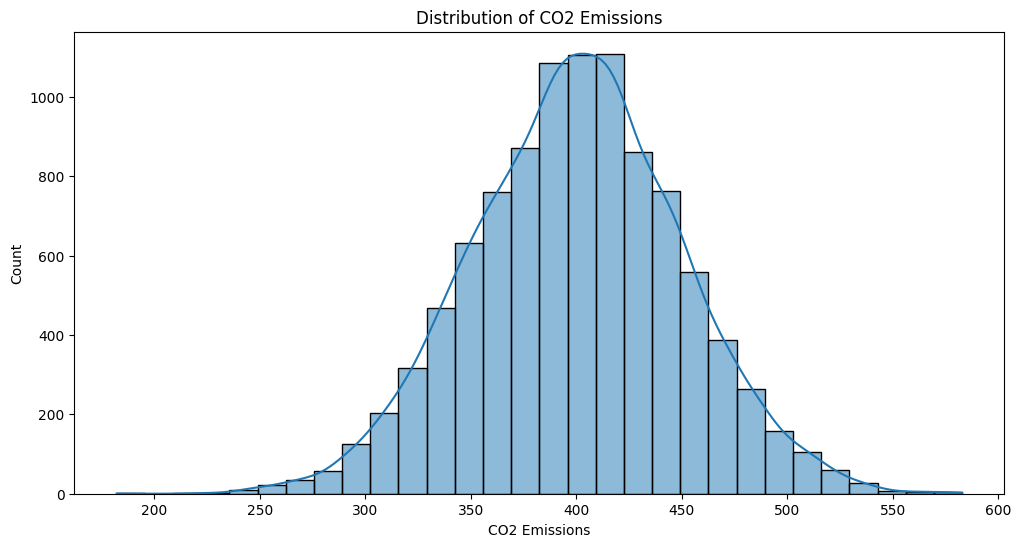

In [19]:
# Data Visualizations
plt.figure(figsize=(12,6))
sns.histplot(classification_df["CO2 Emissions"], bins=30, kde=True)
plt.title("Distribution of CO2 Emissions")
plt.show()

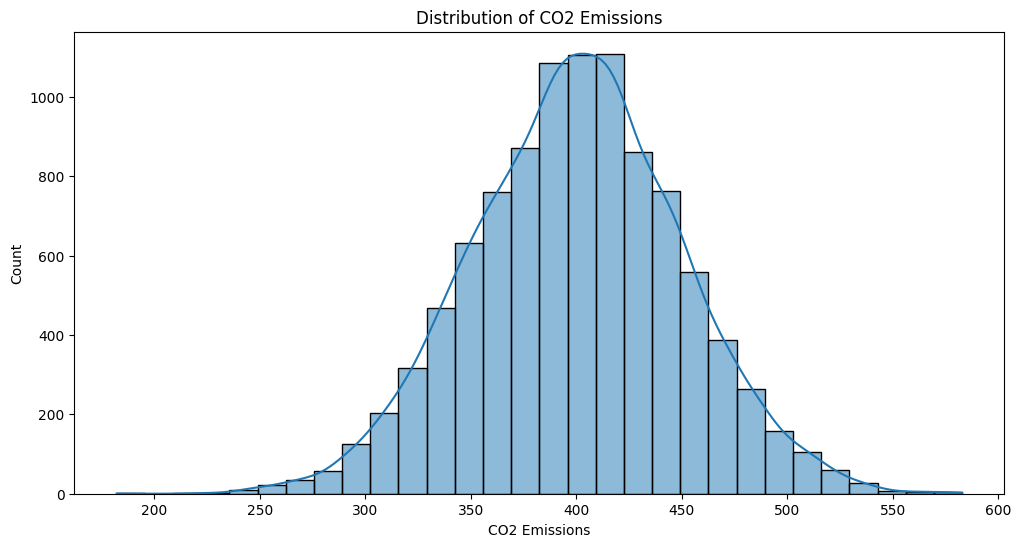

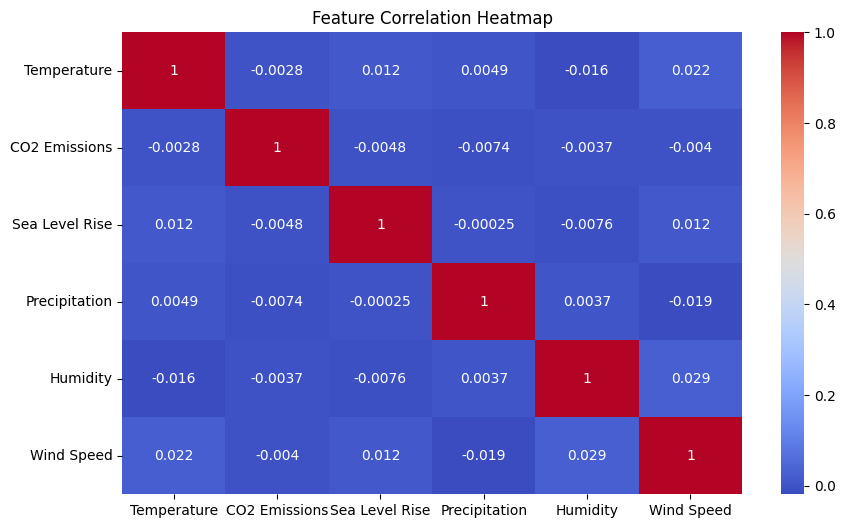

In [21]:
# Data Visualizations
plt.figure(figsize=(12,6))
sns.histplot(classification_df["CO2 Emissions"], bins=30, kde=True)
plt.title("Distribution of CO2 Emissions")
plt.show()
# %%

# Select only numerical features for correlation analysis
numerical_features = classification_df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [22]:
# Creating Climate Risk Levels (Target Variable)
classification_df['Risk Level'] = pd.qcut(classification_df['CO2 Emissions'], q=3, labels=["Low", "Medium", "High"])
le = LabelEncoder()
classification_df['Risk Level'] = le.fit_transform(classification_df['Risk Level'])

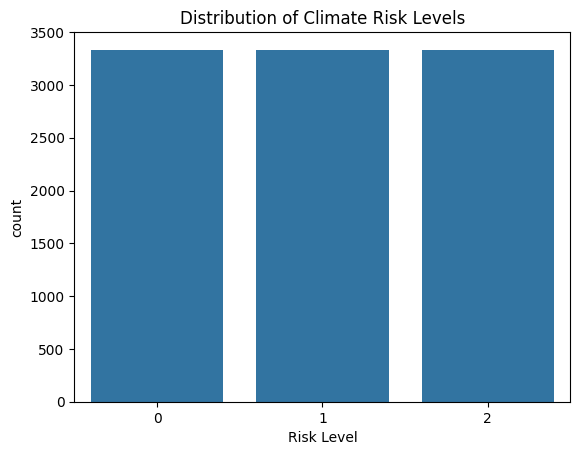

In [23]:

# Checking Class Distribution
sns.countplot(x=classification_df['Risk Level'])
plt.title("Distribution of Climate Risk Levels")
plt.show()


In [24]:
# 3️⃣ Feature Selection
X = classification_df.drop(columns=['Risk Level', 'Date', 'Location', 'Country'])  # Dropping non-numeric
y = classification_df['Risk Level']


In [25]:
# Selecting Top Features
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

In [26]:

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity',
       'Wind Speed'],
      dtype='object')


In [27]:

# Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [28]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [30]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        for _ in range(self.epochs): # Fixed indentation: Removed extra space
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [31]:

# Train Custom Logistic Regression Model
custom_lr = CustomLogisticRegression()
custom_lr.fit(X_train, y_train)
y_custom_pred = custom_lr.predict(X_test)

In [34]:
# Evaluation
print("Custom Logistic Regression Report:\n", classification_report(y_test, y_custom_pred))

Custom Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      0.31      0.47       637
           1       0.36      1.00      0.53       652
           2       0.00      0.00      0.00       711

    accuracy                           0.42      2000
   macro avg       0.45      0.44      0.34      2000
weighted avg       0.44      0.42      0.32      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# 5️⃣ Primary Models (Logistic Regression & Decision Tree)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_log_pred = log_reg.predict(X_test)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_dt_pred = dt_clf.predict(X_test)

In [36]:
# Evaluating Both Models
print("Logistic Regression Report:\n", classification_report(y_test, y_log_pred))
print("Decision Tree Report:\n", classification_report(y_test, y_dt_pred))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       637
           1       1.00      0.99      0.99       652
           2       0.99      1.00      0.99       711

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       637
           1       1.00      1.00      1.00       652
           2       1.00      1.00      1.00       711

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [37]:

# 6️⃣ Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(estimator=LogisticRegression(solver='liblinear'), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("Best Hyperparameters for Logistic Regression:", best_params)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l1'}


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
# Train Final Optimized Model
best_log_reg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='liblinear')
best_log_reg.fit(X_train, y_train)
y_final_pred = best_log_reg.predict(X_test)

print("Final Optimized Logistic Regression Report:\n", classification_report(y_test, y_final_pred))


Final Optimized Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       637
           1       0.99      1.00      1.00       652
           2       1.00      0.98      0.99       711

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [40]:
# 7️⃣ Conclusion
print("\nFinal Conclusion:")
print("1. The Decision Tree classifier performed better on training data but may be prone to overfitting.")
print("2. Logistic Regression performed well and was optimized using GridSearchCV.")
print("3. Feature Selection improved model interpretability without sacrificing accuracy.")
print("4. Hyperparameter tuning enhanced logistic regression's accuracy.")
print("5. Future improvements: Try ensemble methods like Random Forest for better generalization.")
print("2. Logistic Regression performed well and was optimized using GridSearchCV.")
print("3. Feature Selection improved model interpretability without sacrificing accuracy.")
print("4. Hyperparameter tuning enhanced logistic regression's accuracy.")
print("5. Future improvements: Try ensemble methods like Random Forest for better generalization.")


Final Conclusion:
1. The Decision Tree classifier performed better on training data but may be prone to overfitting.
2. Logistic Regression performed well and was optimized using GridSearchCV.
3. Feature Selection improved model interpretability without sacrificing accuracy.
4. Hyperparameter tuning enhanced logistic regression's accuracy.
5. Future improvements: Try ensemble methods like Random Forest for better generalization.
2. Logistic Regression performed well and was optimized using GridSearchCV.
3. Feature Selection improved model interpretability without sacrificing accuracy.
4. Hyperparameter tuning enhanced logistic regression's accuracy.
5. Future improvements: Try ensemble methods like Random Forest for better generalization.
